- Customer Number: Este es un número secuencial asignado a los clientes (esta columna está oculta y excluida; este identificador único no se usará directamente).

- Offer Accepted: ¿Aceptó el cliente (Sí) o rechazó (No) la oferta?

- Reward: el tipo de programa de recompensa ofrecido para la tarjeta.

- Mailer Type:carta o postal.

- Income Level: bajo, medio o alto.

- Bank Accounts Open: cuántas cuentas no de tarjeta de crédito tiene el cliente.

- Overdraft Protection: ¿Tiene el cliente protección contra sobregiros en sus cuentas de cheques (Sí o No)?

- Credit Rating: baja, media o alta.

- Credit Cards Held: el número de tarjetas de crédito poseídas en el banco.

- Homes Owned: el número de viviendas poseídas por el cliente.

- Household Size: número de individuos en la familia.

- Own Your Home: ¿El cliente es propietario de su hogar? (Sí o No).

- Average Balance: saldo promedio de la cuenta (en todas las cuentas a lo largo del tiempo). Q1, Q2, Q3 y Q4

- Balance: saldo promedio para cada trimestre en el último año.

In [1079]:
import pandas as pd
import numpy as np
import sidetable
import src as sp

#librerias limpieza de nulos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
#libreria para el balanceo
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# librerías para crear el modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder  

from sklearn import tree

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [1080]:
df = pd.read_csv("datos/creditcardmarketing.csv",index_col=0)
df = df.reset_index()

df.head(10)

,1,No,Air Miles,Letter,High,1.1,No.1,High.1,2,1.2,4,No.2,1160.75,1669,877,1095,1002
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0
5,7,No,Air Miles,Letter,Medium,1,No,Medium,2,1,3,No,283.75,468.0,188.0,347.0,132.0
6,8,No,Cash Back,Postcard,Low,1,No,Medium,4,1,4,Yes,278.50,132.0,391.0,285.0,306.0
7,9,No,Air Miles,Postcard,Medium,1,No,Low,2,1,4,Yes,1005.00,894.0,891.0,882.0,1353.0
8,10,No,Air Miles,Letter,High,2,No,Low,3,2,4,Yes,974.25,1814.0,1454.0,514.0,115.0
9,11,No,Air Miles,Postcard,Medium,1,No,Medium,3,1,2,Yes,1135.25,762.0,827.0,1454.0,1498.0


Renombramos las columnas

In [1081]:
col = ['Customer_Number',"Offer_Accepted","Reward","Mailer_Type","Income_Level","Bank_Accounts_Open","Overdraft_Protection","Credit_Rating","Credit_Cards_Held","Homes_Owned","Household_Size","Own_Your_Home","Average_Balance_Q1","Average_Balance_Q2","Average_Balance_Q3","Average_Balance_Q4","Balance"]
df.columns = col
df.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0


### Análisis exploratorio (EDA)


In [1082]:
# Vemos la cantidad de datos que tenemos
df.shape

(17999, 17)

In [1083]:
# Vemos los nulos que tenemos en los datos
df.isnull().sum()

Customer_Number          0
Offer_Accepted           0
Reward                   0
Mailer_Type              0
Income_Level             0
Bank_Accounts_Open       0
Overdraft_Protection     0
Credit_Rating            0
Credit_Cards_Held        0
Homes_Owned              0
Household_Size           0
Own_Your_Home            0
Average_Balance_Q1      24
Average_Balance_Q2      24
Average_Balance_Q3      24
Average_Balance_Q4      24
Balance                 24
dtype: int64

In [1084]:
# Vemos 
df.duplicated().sum()

0

In [1085]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17999 entries, 0 to 17998
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       17999 non-null  int64  
 1   Offer_Accepted        17999 non-null  object 
 2   Reward                17999 non-null  object 
 3   Mailer_Type           17999 non-null  object 
 4   Income_Level          17999 non-null  object 
 5   Bank_Accounts_Open    17999 non-null  int64  
 6   Overdraft_Protection  17999 non-null  object 
 7   Credit_Rating         17999 non-null  object 
 8   Credit_Cards_Held     17999 non-null  int64  
 9   Homes_Owned           17999 non-null  int64  
 10  Household_Size        17999 non-null  int64  
 11  Own_Your_Home         17999 non-null  object 
 12  Average_Balance_Q1    17975 non-null  float64
 13  Average_Balance_Q2    17975 non-null  float64
 14  Average_Balance_Q3    17975 non-null  float64
 15  Average_Balance_Q4 

In [1086]:
df.describe(include="object").T

,count,unique,top,freq
Offer_Accepted,17999,2,No,16976
Reward,17999,3,Air Miles,6060
Mailer_Type,17999,2,Postcard,9147
Income_Level,17999,3,Medium,9013
Overdraft_Protection,17999,2,No,15321
Credit_Rating,17999,3,High,6070
Own_Your_Home,17999,2,Yes,11655


In [1087]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,17999.0,9001.000000,5196.008083,2.00,4501.5,9001.0,13500.500,18000.00
Bank_Accounts_Open,17999.0,1.255792,0.472510,1.00,1.0,1.0,1.000,3.00
Credit_Cards_Held,17999.0,1.903495,0.797031,1.00,1.0,2.0,2.000,4.00
Homes_Owned,17999.0,1.203456,0.427350,1.00,1.0,1.0,1.000,3.00
Household_Size,17999.0,3.499028,1.114207,1.00,3.0,3.0,4.000,9.00
Average_Balance_Q1,17975.0,940.503310,350.303729,48.25,787.5,1007.0,1153.125,3366.25
Average_Balance_Q2,17975.0,910.408456,620.068494,0.00,392.5,772.0,1521.000,3450.00
Average_Balance_Q3,17975.0,999.398999,457.414081,0.00,663.0,1032.0,1342.000,3421.00
Average_Balance_Q4,17975.0,1042.030654,553.467854,0.00,633.0,945.0,1463.000,3823.00
Balance,17975.0,810.175132,559.015084,0.00,363.0,703.0,1212.000,4215.00


### Transformacion de los nulos

In [1088]:
# como en este jupyter vamos a trabajar con nulos, lo primero que vamos a hacer es calcular el porcentaje de nulos 
## que tenemos en nuestro dataframe

df.stb.missing()

,missing,total,percent
Balance,24,17999,0.133341
Average_Balance_Q4,24,17999,0.133341
Average_Balance_Q3,24,17999,0.133341
Average_Balance_Q2,24,17999,0.133341
Average_Balance_Q1,24,17999,0.133341
Homes_Owned,0,17999,0.000000
Own_Your_Home,0,17999,0.000000
Household_Size,0,17999,0.000000
Customer_Number,0,17999,0.000000
Offer_Accepted,0,17999,0.000000


Al ser tan pocos el numero de nulos, decido eliminarlos.

In [1089]:
# en este caso haremos un dropna de todo el dataframe donde al menos haya un nulo

df_sin_nulos = df.dropna(how = "any")

In [1090]:
df_sin_nulos.isnull().sum()

Customer_Number         0
Offer_Accepted          0
Reward                  0
Mailer_Type             0
Income_Level            0
Bank_Accounts_Open      0
Overdraft_Protection    0
Credit_Rating           0
Credit_Cards_Held       0
Homes_Owned             0
Household_Size          0
Own_Your_Home           0
Average_Balance_Q1      0
Average_Balance_Q2      0
Average_Balance_Q3      0
Average_Balance_Q4      0
Balance                 0
dtype: int64

# ?¿

Aplicamos una función del soporte para sustituir los nulos por el metodo iterative imputer, en este caso por la media.

In [1077]:
#df2= sp.limpiar_nulos_iterative_imputer(df)

In [1078]:
#df2

Offer_Accepted           0
Customer_Number         24
Income_Level            24
Bank_Accounts_Open      24
Overdraft_Protection    24
Credit_Cards_Held       24
Homes_Owned             24
Household_Size          24
Own_Your_Home           24
Average_Balance_Q1      24
Average_Balance_Q2      24
Average_Balance_Q3      24
Average_Balance_Q4      24
Balance                 24
Reward_Air Miles        24
Reward_Cash Back        24
Reward_Points           24
Mailer_Type_Letter      24
Mailer_Type_Postcard    24
Credit_Rating_High      24
Credit_Rating_Low       24
Credit_Rating_Medium    24
dtype: int64

KNN Imputer

## Análisis exploratorio visual
En este apartado se realizarán una serie de gráficos para entender el problema y entender cuales son las principales características que determinan que una persona sufra un infarto de corazón o no. Para ello, se usará la visualización a través de las herramientas de seaborn y matplotlib

In [1091]:
df2 = df_sin_nulos
df2.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,1114.75,1847.0,1365.0,750.0,497.0


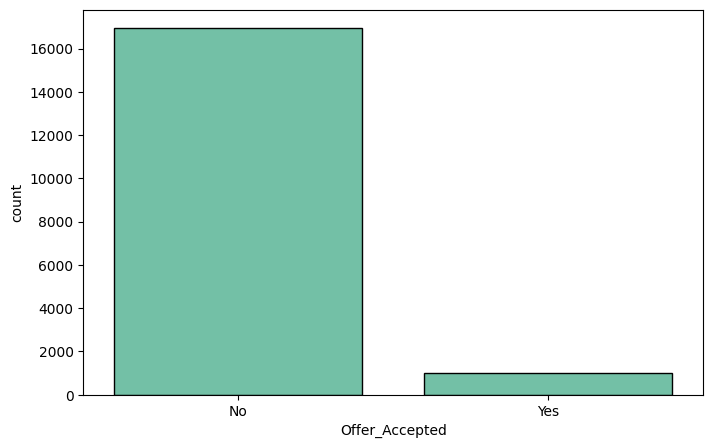

In [1092]:
### Variable respuesta 
plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura

fig1 = sns.countplot(data = df2, x = "Offer_Accepted",  color = "mediumaquamarine",  edgecolor='black'); 
fig1.set(xticklabels=["No", "Yes"]) 
plt.show();

In [1093]:
df2["Offer_Accepted"].value_counts() / df.shape[0]

No     0.941941
Yes    0.056725
Name: Offer_Accepted, dtype: float64

La muestra de los que dicen "yes" es mucho menor de los que dicen "no", hay problemas de desbalanceo.

Variables categoricas


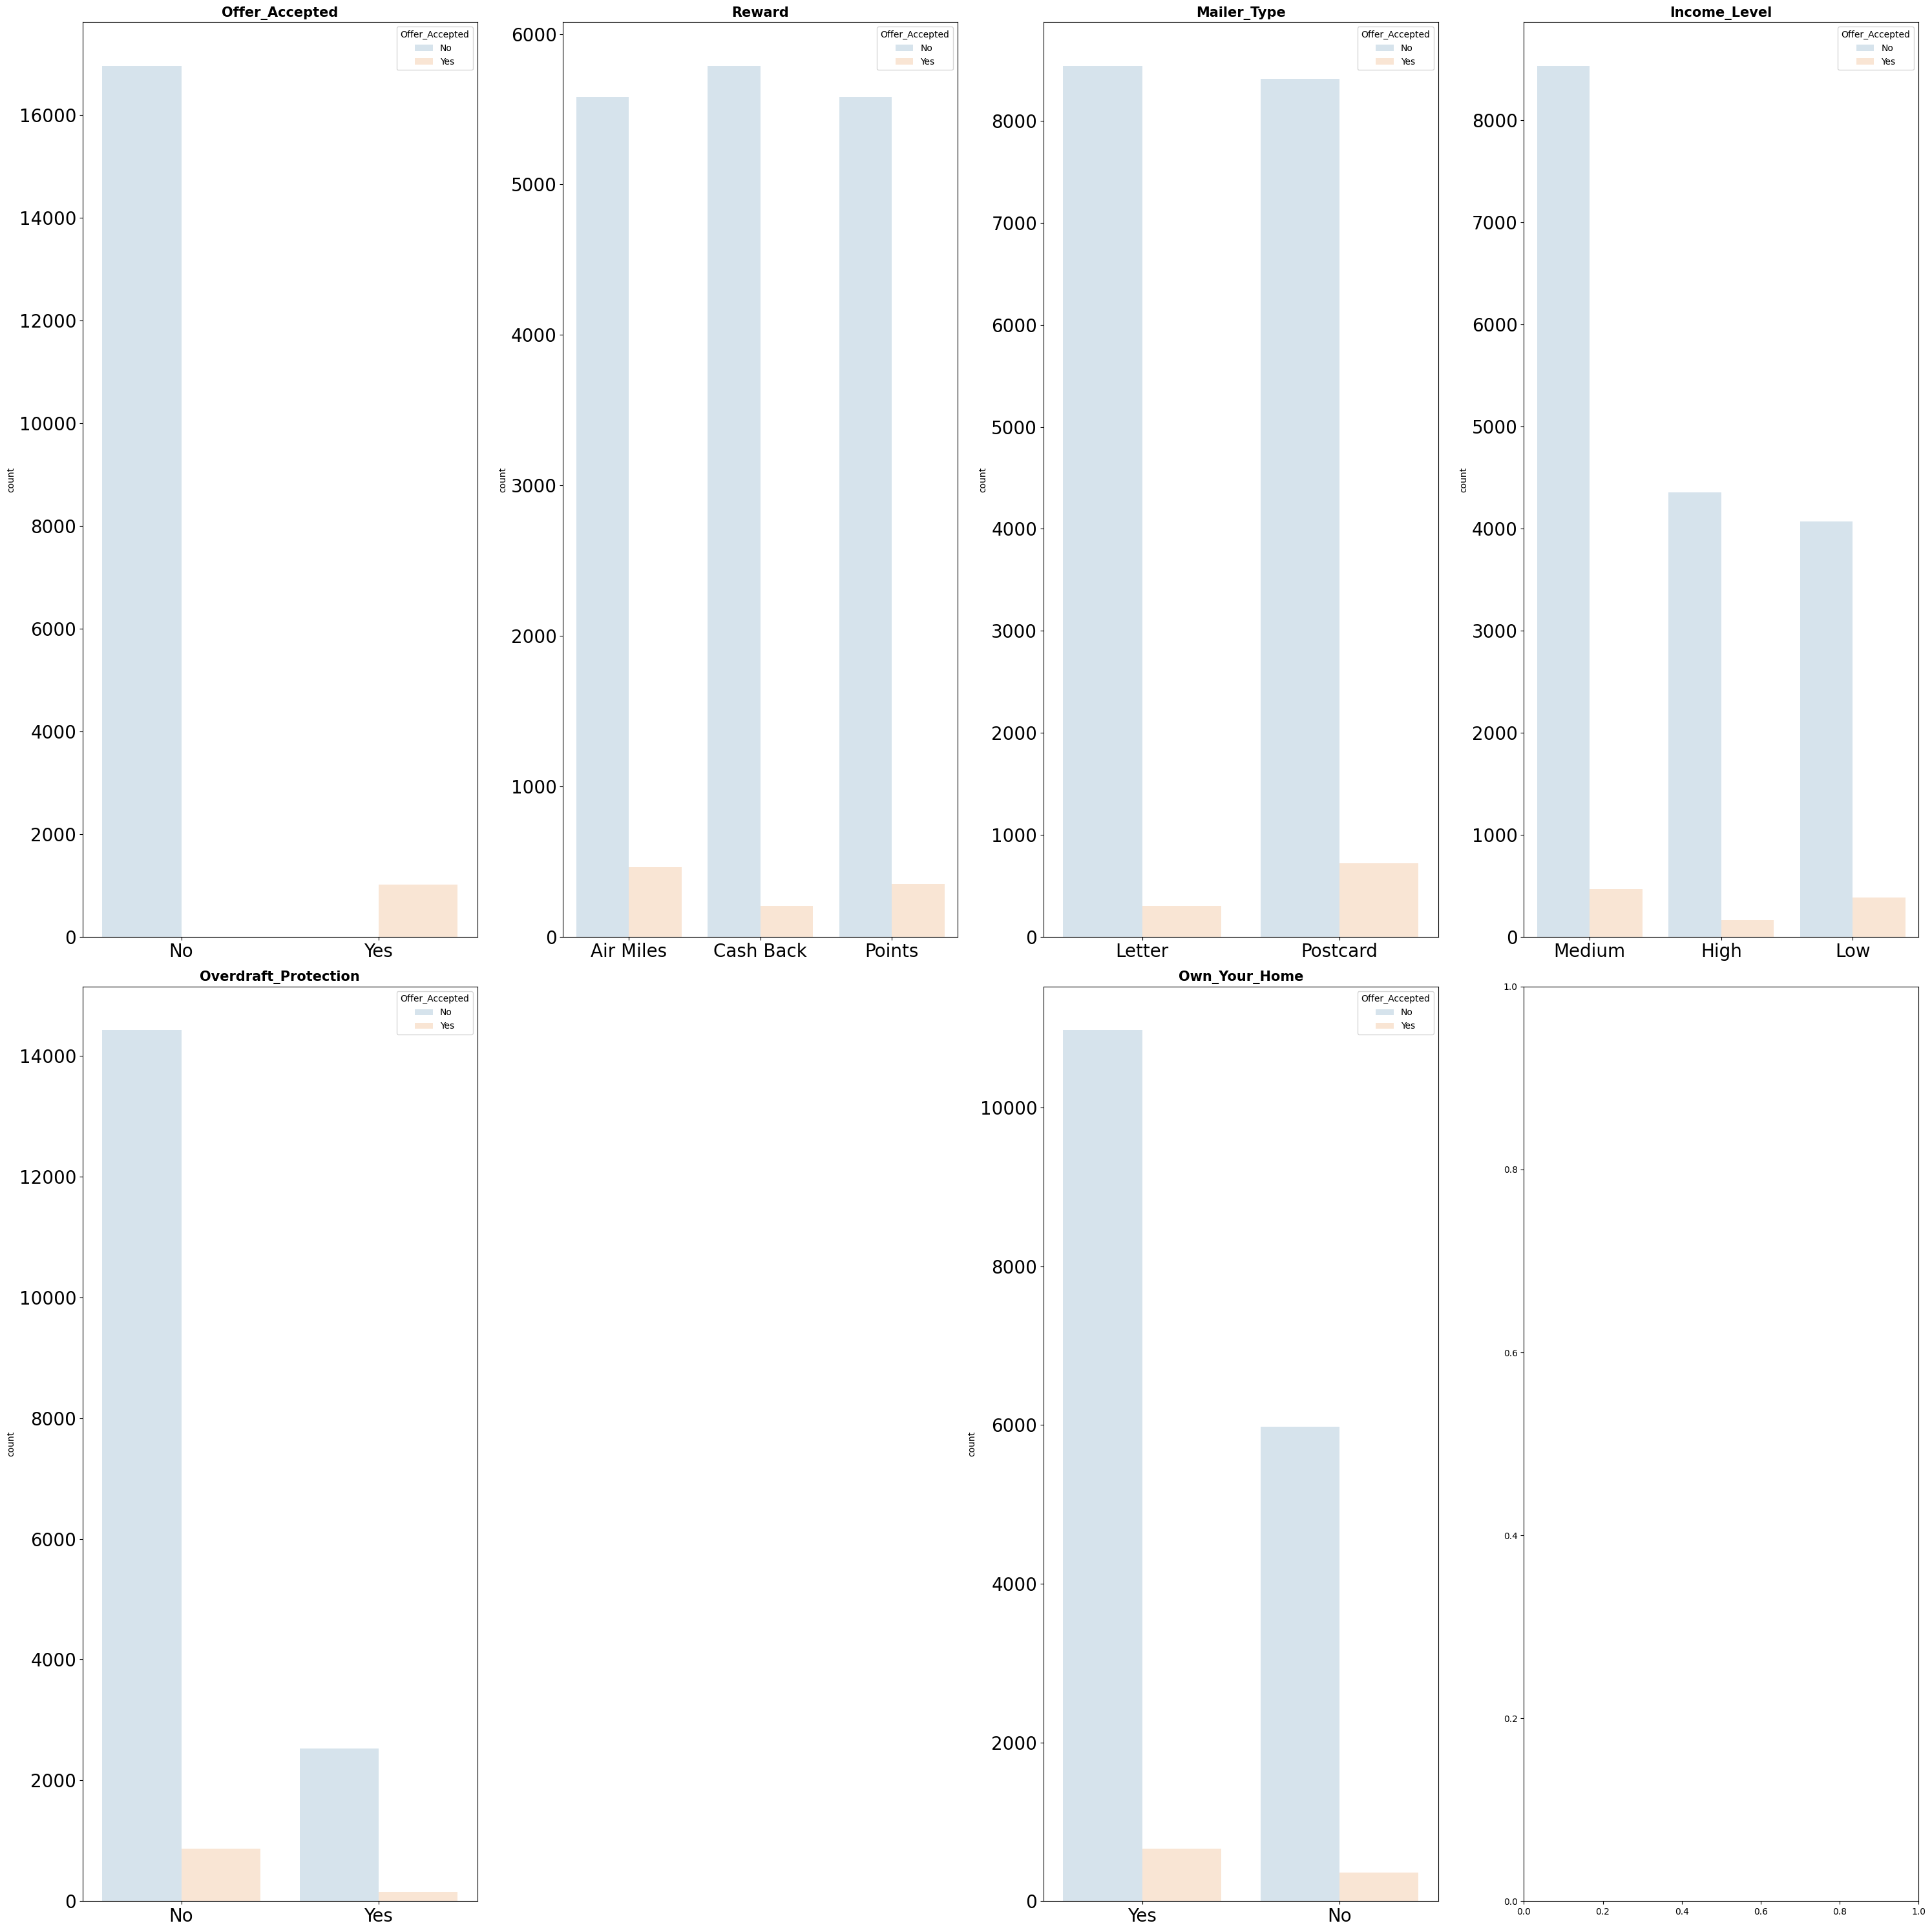

In [1094]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols =4, figsize = (30, 30))


axes = axes.flat

columnas_cat = df2.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_cat): 
    sns.countplot(
        data = df2,
        x = colum,
        hue = "Offer_Accepted",
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.delaxes(axes[5])
fig.tight_layout();

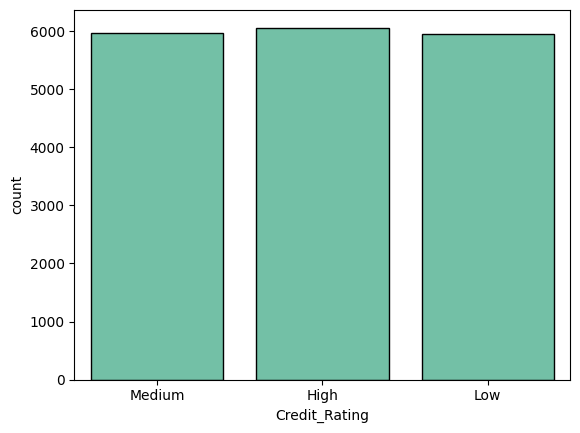

In [1095]:
sns.countplot(data = df2, x = "Credit_Rating",  color = "mediumaquamarine",  edgecolor='black');

### Resumen:
- Hay una gran diferencia entre la gente que acepta la oferta y la que no
- El rechazo de la ofertas es parecido, no parece destacar ninguna. En cambio, las personas que aceptan, lo hacen mas en este orden, Air miles,points y Cash back, con una diferencia pequeña, al ser la muestra pequeña.
- Las personas que rechazan, el mailer_type, lo rechazan igual de las 2 maneras. Las personas que lo aceptan, lo hacen mas a través de Postcard.
- En proporción, la clase media es la que menos tarjetas acepta, de todos los ofertados, la gran mayoria son de la clase media y muy poco de estos aceptan tarjeta. Los que mas aceptan son los de clase baja, al ser la muestra casi la mitad que la de clase media y parecida la cantidad de gente que la acepta. Se podria estudiar las ofertas por clases sociales, haciendolas mas personalizadas para cada usuario.
- La columna de Overdraft_pretection parece tener una proporcion similar, se ve asi debido al desbalanceo de la muestra entre "si" y "no".
- Por lo general, la gente que no es propietaria de su casa, suelen aceptar mas las ofertas de créditpo.

variables continuas


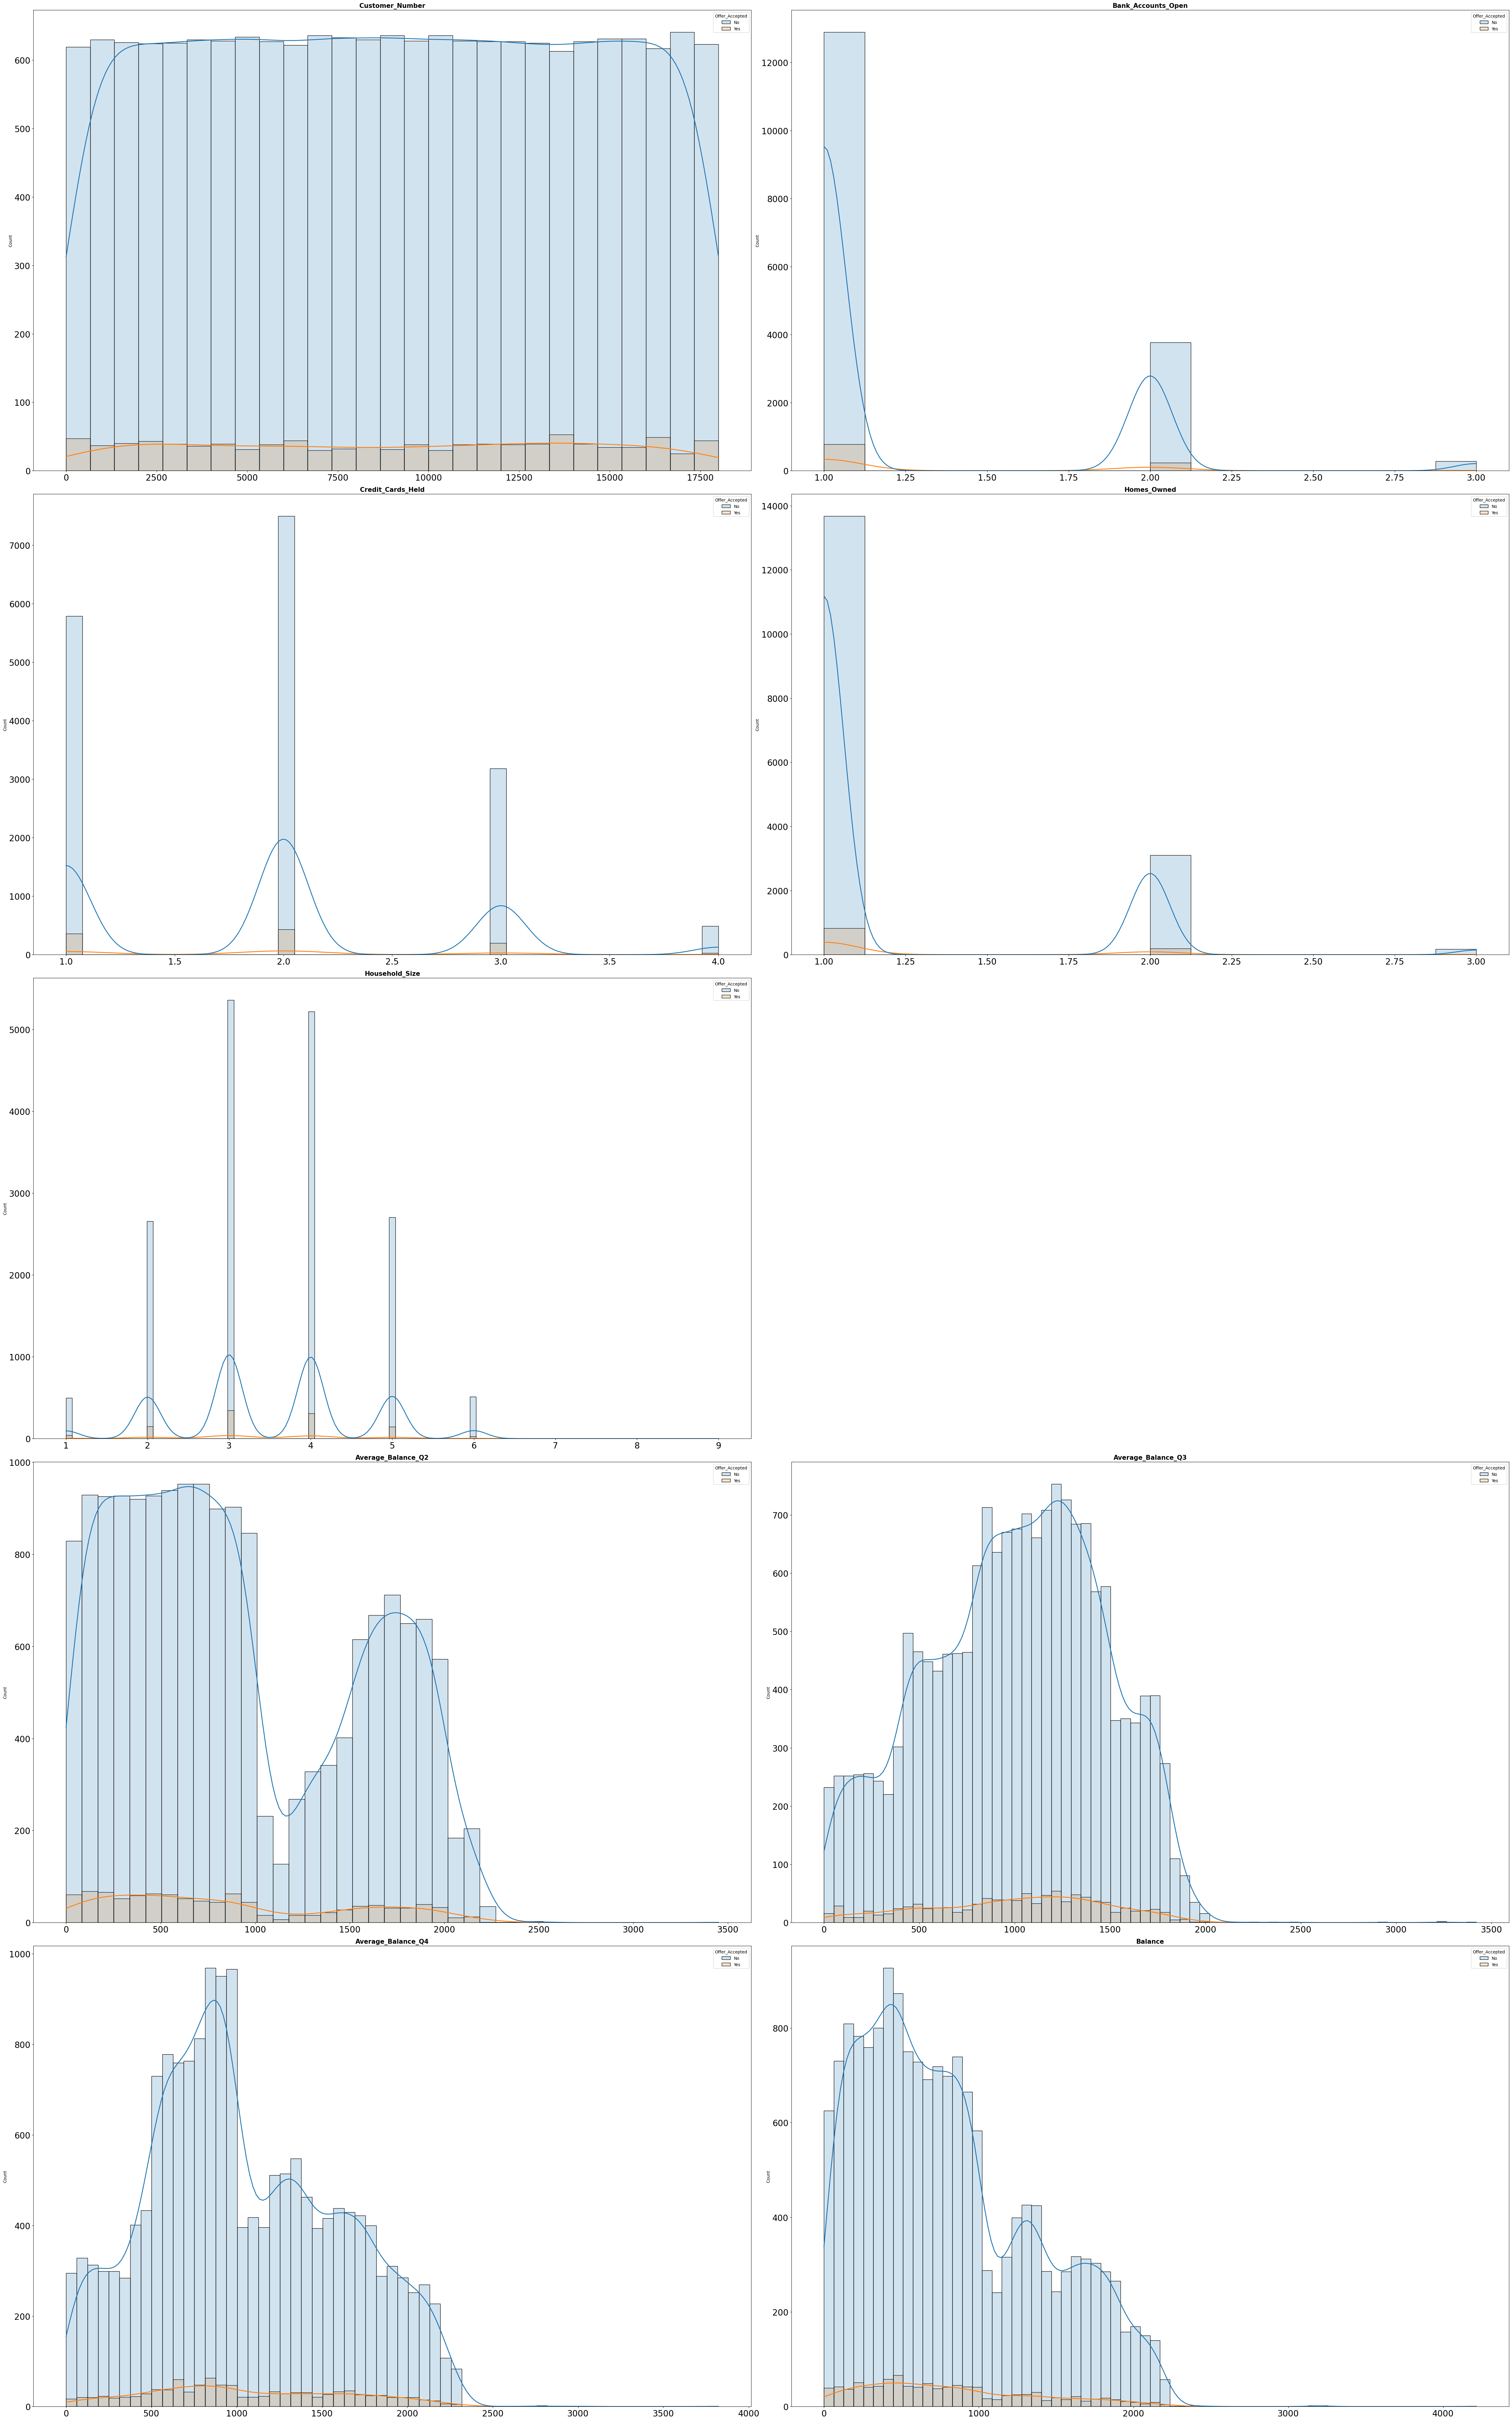

In [1096]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (50, 80))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "blue","purple","pink", "grey","green"]

axes = axes.flat

columnas_numeric = df2.select_dtypes(include = np.number).columns
#columnas_numeric = columnas_numeric.drop("Offer_Accepted")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df2,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2},
        hue = "Offer_Accepted", 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    


fig.delaxes(axes[5])

fig.tight_layout();

<AxesSubplot: xlabel='Average_Balance_Q2', ylabel='Count'>

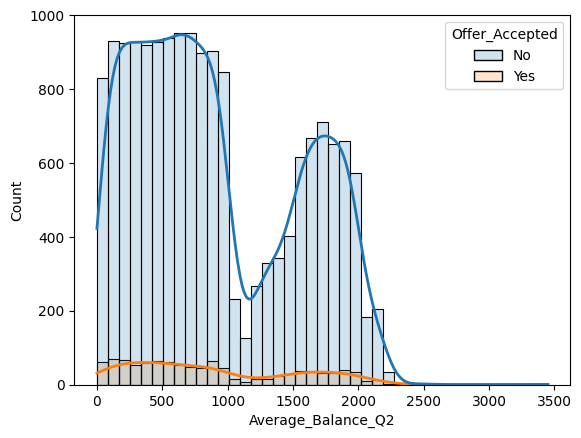

In [1097]:
# no entiendo por que no aparece Q2 en la de arriba02
sns.histplot(
        data = df2,
        x = "Average_Balance_Q2",
        kde = True, 
        color = "blue", 
        line_kws = {"linewidth": 2}, 
        hue = "Offer_Accepted",
        alpha = 0.2)

<AxesSubplot: xlabel='Bank_Accounts_Open', ylabel='Count'>

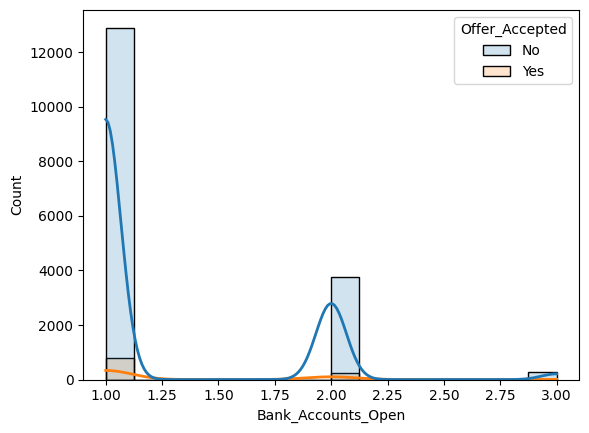

In [1098]:
# Hacemos mas grande "Bank_Accounts_Open" para verlo mejor
sns.histplot(
        data = df2,
        x = "Bank_Accounts_Open",
        kde = True, 
        color = "blue", 
        hue = "Offer_Accepted",
        line_kws = {"linewidth": 2}, 
        alpha = 0.2)
    
    


<AxesSubplot: xlabel='Homes_Owned', ylabel='Count'>

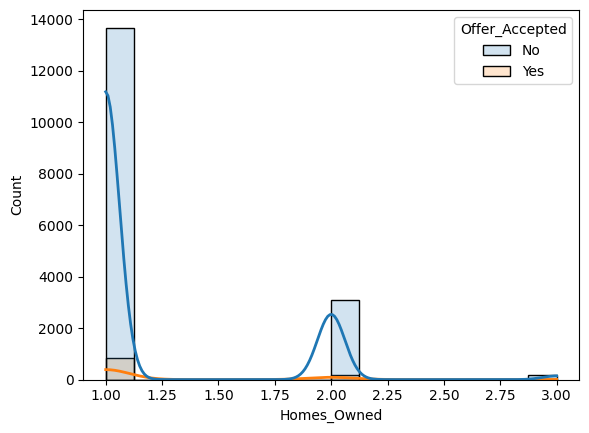

In [1099]:
# Hacemos mas grande "Homes_Owned" para verlo mejor
sns.histplot(
        data = df2,
        x = "Homes_Owned",
        kde = True, 
        color = "red", 
        hue = "Offer_Accepted",
        line_kws = {"linewidth": 2}, 
        alpha = 0.2)

## Resumen análisis de las variables numéricas:

Después de haber realizado un análisis exploratorio, se ha llegado a la conclusión de que existe una predominancia en el número de clientes con una única cuenta y tarjeta de crédito.
Es importante resaltar que la mayoria de clientes son propietarios de sus viviendas, siendo frecuente encontrar individuos con una única propiedad.
Si enfocamos el análisis en el tamaño de las propiedades, se destaca que aquellos usuarios que aceptan las ofertas de tarjetas de crédito, suelen poseer casas mas amplias que oscilan entre 3-4 habitaciones.
En cuanto al balance o saldo promedio trimestral durante el ultimo año, se identifica una tendencia que va del rango de 0-2000, teniendo un pequeño pico en torno a 500. 

## Gráfico de correlación  o *Heatmap* 
Los mapas de calor son un tipo de gráfico que es necesario cuando necesitamos encontrar la relación entre las variables dependientes o predictoras. Una de las mejores maneras de encontrar la relación entre las características se puede hacer utilizando mapas de calor.

In [1100]:
df_numericas = df2.select_dtypes(include = np.number)
df_numericas.head()

,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,2,1,2,2,5,147.25,39.0,106.0,78.0,366.0
1,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0
2,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
3,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
4,6,1,3,1,4,1114.75,1847.0,1365.0,750.0,497.0


In [1101]:
correlation = df_numericas.corr()
correlation

,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
Customer_Number,1.000000,-0.004288,-0.008141,-0.002780,0.006546,0.009418,0.012335,0.011545,0.006411,-0.005869
Bank_Accounts_Open,-0.004288,1.000000,-0.001629,0.004748,0.008635,-0.003891,-0.002777,-0.007964,0.000193,-0.000345
Credit_Cards_Held,-0.008141,-0.001629,1.000000,-0.002387,-0.003043,-0.003473,-0.009454,-0.007371,-0.007624,0.015360
Homes_Owned,-0.002780,0.004748,-0.002387,1.000000,0.005239,0.017984,0.013176,0.009751,0.007777,0.014784
Household_Size,0.006546,0.008635,-0.003043,0.005239,1.000000,-0.003598,-0.005111,-0.008759,0.003630,0.000223
Average_Balance_Q1,0.009418,-0.003891,-0.003473,0.017984,-0.003598,1.000000,0.481490,0.800305,0.752746,0.572376
Average_Balance_Q2,0.012335,-0.002777,-0.009454,0.013176,-0.005111,0.481490,1.000000,0.483173,-0.060970,-0.237317
Average_Balance_Q3,0.011545,-0.007964,-0.007371,0.009751,-0.008759,0.800305,0.483173,1.000000,0.487712,0.168961
Average_Balance_Q4,0.006411,0.000193,-0.007624,0.007777,0.003630,0.752746,-0.060970,0.487712,1.000000,0.565298
Balance,-0.005869,-0.000345,0.015360,0.014784,0.000223,0.572376,-0.237317,0.168961,0.565298,1.000000


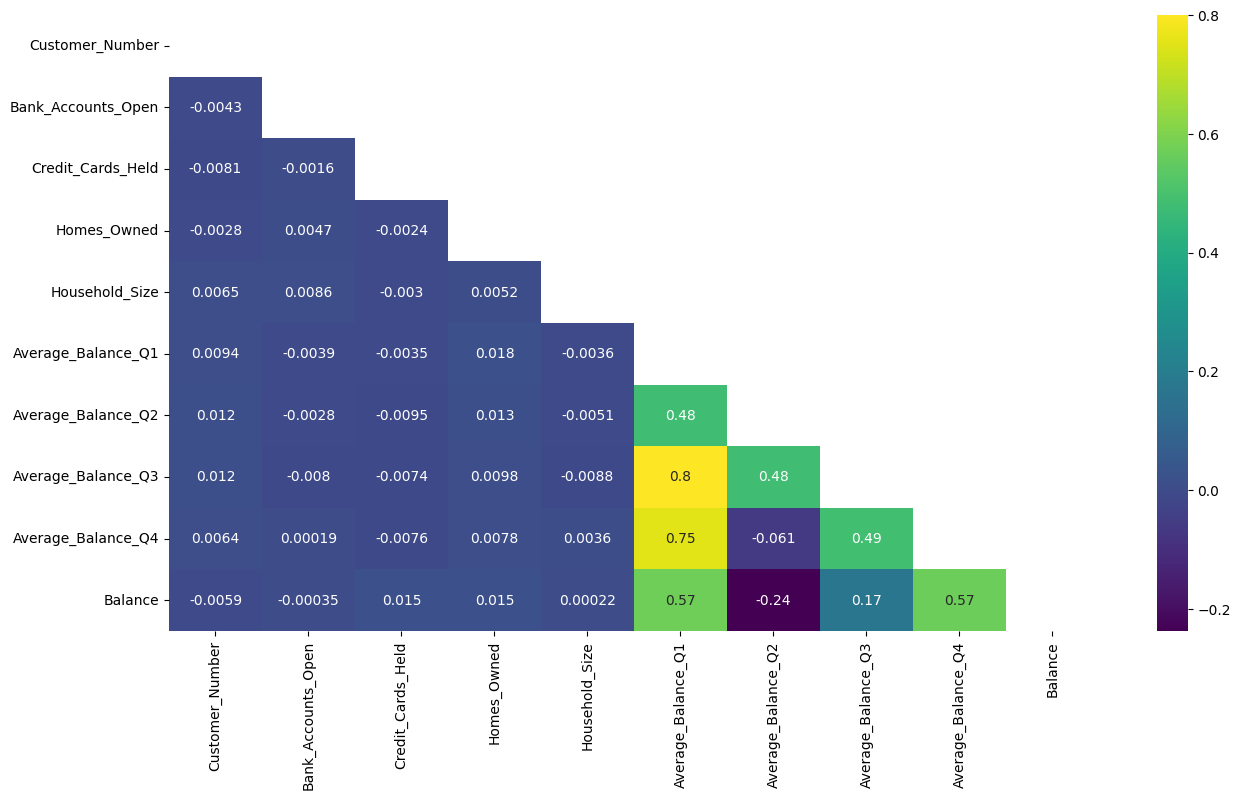

In [1102]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, cmap="viridis", annot = True, mask = mask); #barra lateral

# Outliers

In [1103]:
#df_numericas = df_numericas.drop(["Bank_Accounts_Open","Homes_Owned","Household_Size","Credit_Cards_Held"], axis = 1)

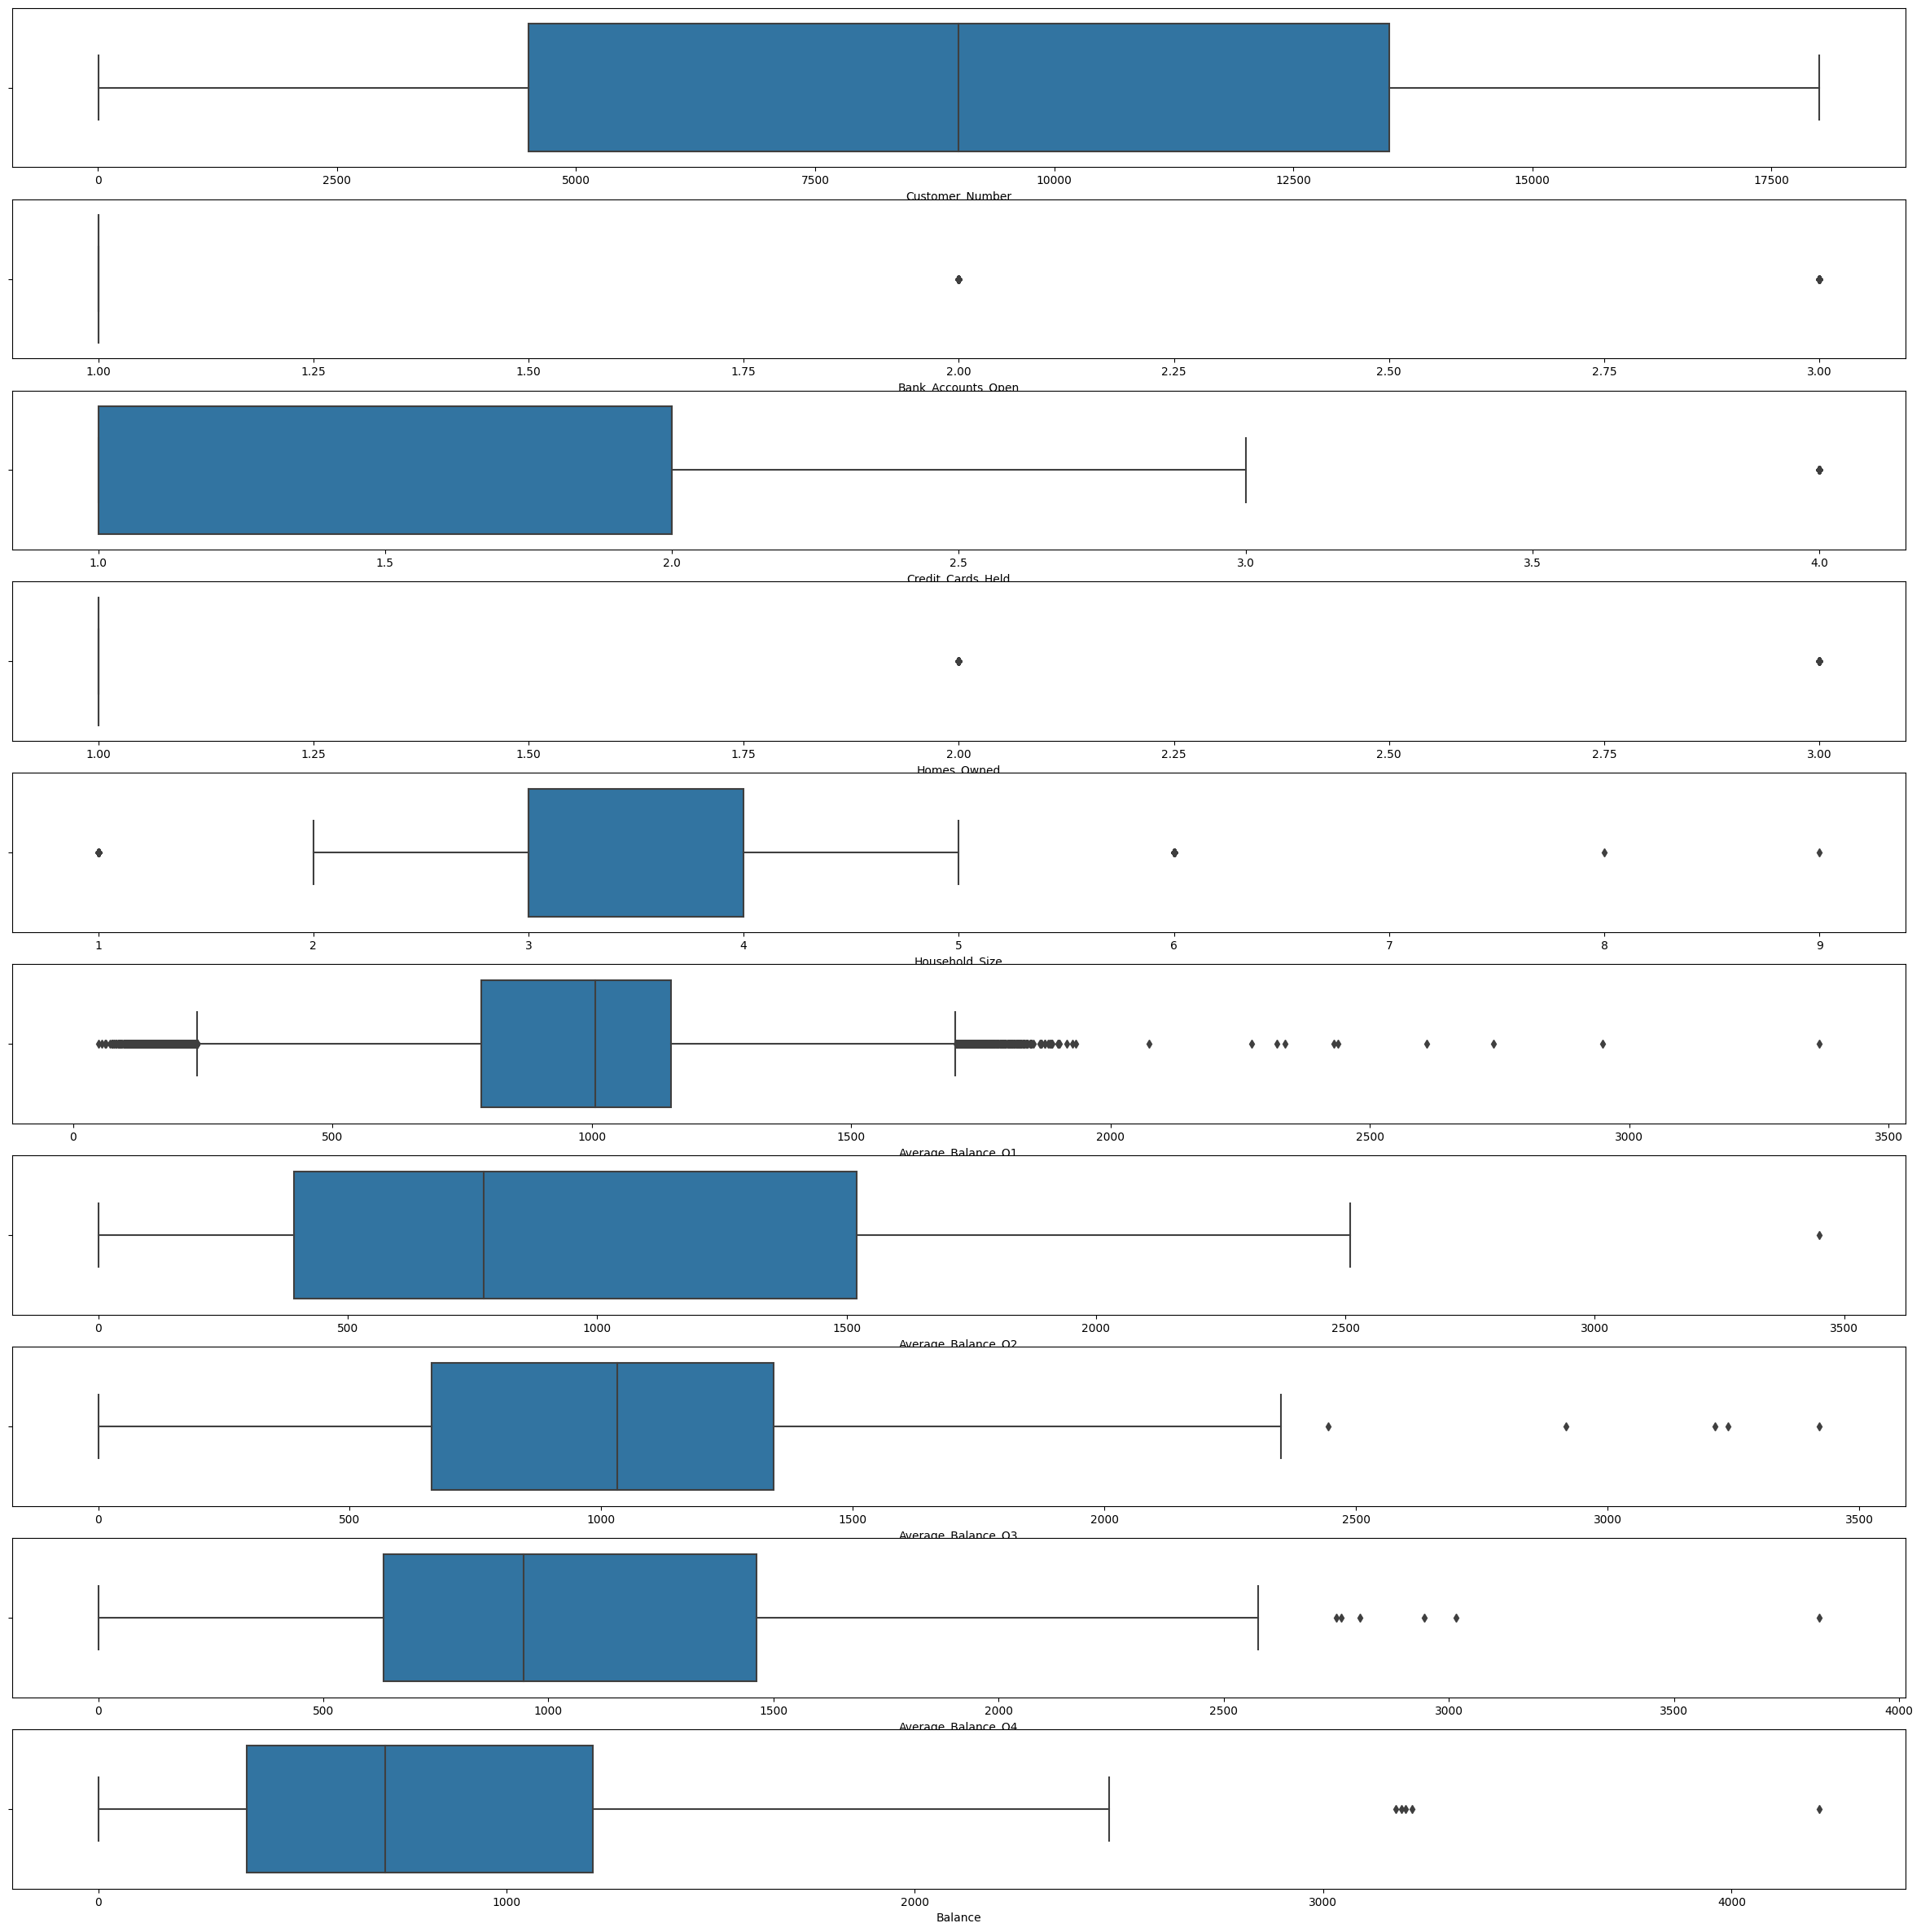

In [1104]:

fig, ax = plt.subplots(10, 1, figsize=(30,30))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

In [1105]:
df3 = df2.copy()

In [1106]:
df_numericas_3 = df3.select_dtypes(include = np.number)
df_numericas_3 = df_numericas_3.drop(["Bank_Accounts_Open","Homes_Owned","Household_Size", "Credit_Cards_Held"], axis = 1)
df_numericas_3.head()

,Customer_Number,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,2,147.25,39.0,106.0,78.0,366.0
1,3,276.50,367.0,352.0,145.0,242.0
2,4,1219.00,1578.0,1760.0,1119.0,419.0
3,5,1211.00,2140.0,1357.0,982.0,365.0
4,6,1114.75,1847.0,1365.0,750.0,497.0


In [1107]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [1108]:
lista_columnas = df_numericas_3.columns
lista_columnas

Index(['Customer_Number', 'Average_Balance_Q1', 'Average_Balance_Q2',
       'Average_Balance_Q3', 'Average_Balance_Q4', 'Balance'],
      dtype='object')

In [1109]:
# aplicamos la función y sacamos los índices de los outliers.

ind = detectar_outliers(lista_columnas, df3)
print(ind)

{'Average_Balance_Q1': [0, 21, 40, 78, 90, 97, 100, 133, 135, 148, 179, 180, 182, 195, 197, 199, 213, 215, 236, 241, 253, 260, 278, 287, 313, 333, 341, 344, 379, 381, 420, 429, 440, 453, 459, 516, 520, 526, 539, 567, 590, 596, 604, 606, 635, 640, 648, 660, 668, 685, 763, 766, 775, 801, 822, 827, 838, 839, 840, 860, 869, 891, 893, 905, 927, 979, 981, 985, 994, 1026, 1043, 1051, 1054, 1074, 1076, 1089, 1095, 1106, 1119, 1133, 1134, 1137, 1139, 1147, 1150, 1155, 1163, 1186, 1192, 1211, 1215, 1233, 1253, 1254, 1257, 1261, 1268, 1282, 1286, 1291, 1295, 1311, 1330, 1338, 1364, 1380, 1391, 1396, 1398, 1399, 1403, 1404, 1408, 1414, 1418, 1423, 1425, 1430, 1476, 1483, 1487, 1494, 1501, 1514, 1516, 1524, 1547, 1558, 1561, 1572, 1577, 1578, 1585, 1586, 1605, 1608, 1620, 1622, 1629, 1634, 1638, 1660, 1684, 1686, 1700, 1714, 1715, 1742, 1772, 1781, 1784, 1810, 1832, 1839, 1843, 1856, 1872, 1880, 1884, 1914, 1915, 1919, 1966, 1972, 1976, 2000, 2013, 2020, 2027, 2033, 2034, 2036, 2048, 2056, 2061, 20

In [1110]:
ind.keys()

dict_keys(['Average_Balance_Q1', 'Average_Balance_Q2', 'Average_Balance_Q3', 'Average_Balance_Q4', 'Balance'])

In [1111]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,17975.0,9000.227816,5196.669952,2.00,4499.5,9001.0,13501.500,18000.00
Bank_Accounts_Open,17975.0,1.255744,0.472414,1.00,1.0,1.0,1.000,3.00
Credit_Cards_Held,17975.0,1.903421,0.797108,1.00,1.0,2.0,2.000,4.00
Homes_Owned,17975.0,1.203561,0.427455,1.00,1.0,1.0,1.000,3.00
Household_Size,17975.0,3.499082,1.114501,1.00,3.0,3.0,4.000,9.00
Average_Balance_Q1,17975.0,940.503310,350.303729,48.25,787.5,1007.0,1153.125,3366.25
Average_Balance_Q2,17975.0,910.408456,620.068494,0.00,392.5,772.0,1521.000,3450.00
Average_Balance_Q3,17975.0,999.398999,457.414081,0.00,663.0,1032.0,1342.000,3421.00
Average_Balance_Q4,17975.0,1042.030654,553.467854,0.00,633.0,945.0,1463.000,3823.00
Balance,17975.0,810.175132,559.015084,0.00,363.0,703.0,1212.000,4215.00


In [1112]:
df3["Average_Balance_Q1"][df3.index== 516]

516    177.25
Name: Average_Balance_Q1, dtype: float64

In [1113]:
for k, v in ind.items():
    valor_25 = df3.describe().T.loc[k]["25%"]
    valor_75 = df3.describe().T.loc[k]["75%"]
    
    for i in v:
        value = df3.at[i,k]
        
        if value <= 500:
            df3.loc[i,k] = valor_25
            
        if value >= 1500:
            df3.loc[i,k] = valor_75  


In [1114]:
df3["Average_Balance_Q1"][df3.index== 516]

516    787.5
Name: Average_Balance_Q1, dtype: float64

In [1115]:
df_numericas_4 = df3.select_dtypes(include= np.number)
df_numericas_4

,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,2,1,2,2,5,787.50,39.0,106.0,78.0,366.0
1,3,2,2,1,2,276.50,367.0,352.0,145.0,242.0
2,4,2,1,1,4,1219.00,1578.0,1760.0,1119.0,419.0
3,5,1,2,1,6,1211.00,2140.0,1357.0,982.0,365.0
4,6,1,3,1,4,1114.75,1847.0,1365.0,750.0,497.0
...,...,...,...,...,...,...,...,...,...,...
17994,17996,1,1,1,5,787.50,136.0,65.0,71.0,398.0
17995,17997,1,3,1,3,850.50,984.0,940.0,943.0,535.0
17996,17998,1,2,1,4,1087.25,918.0,767.0,1170.0,1494.0
17997,17999,1,4,2,2,1022.25,626.0,983.0,865.0,1615.0


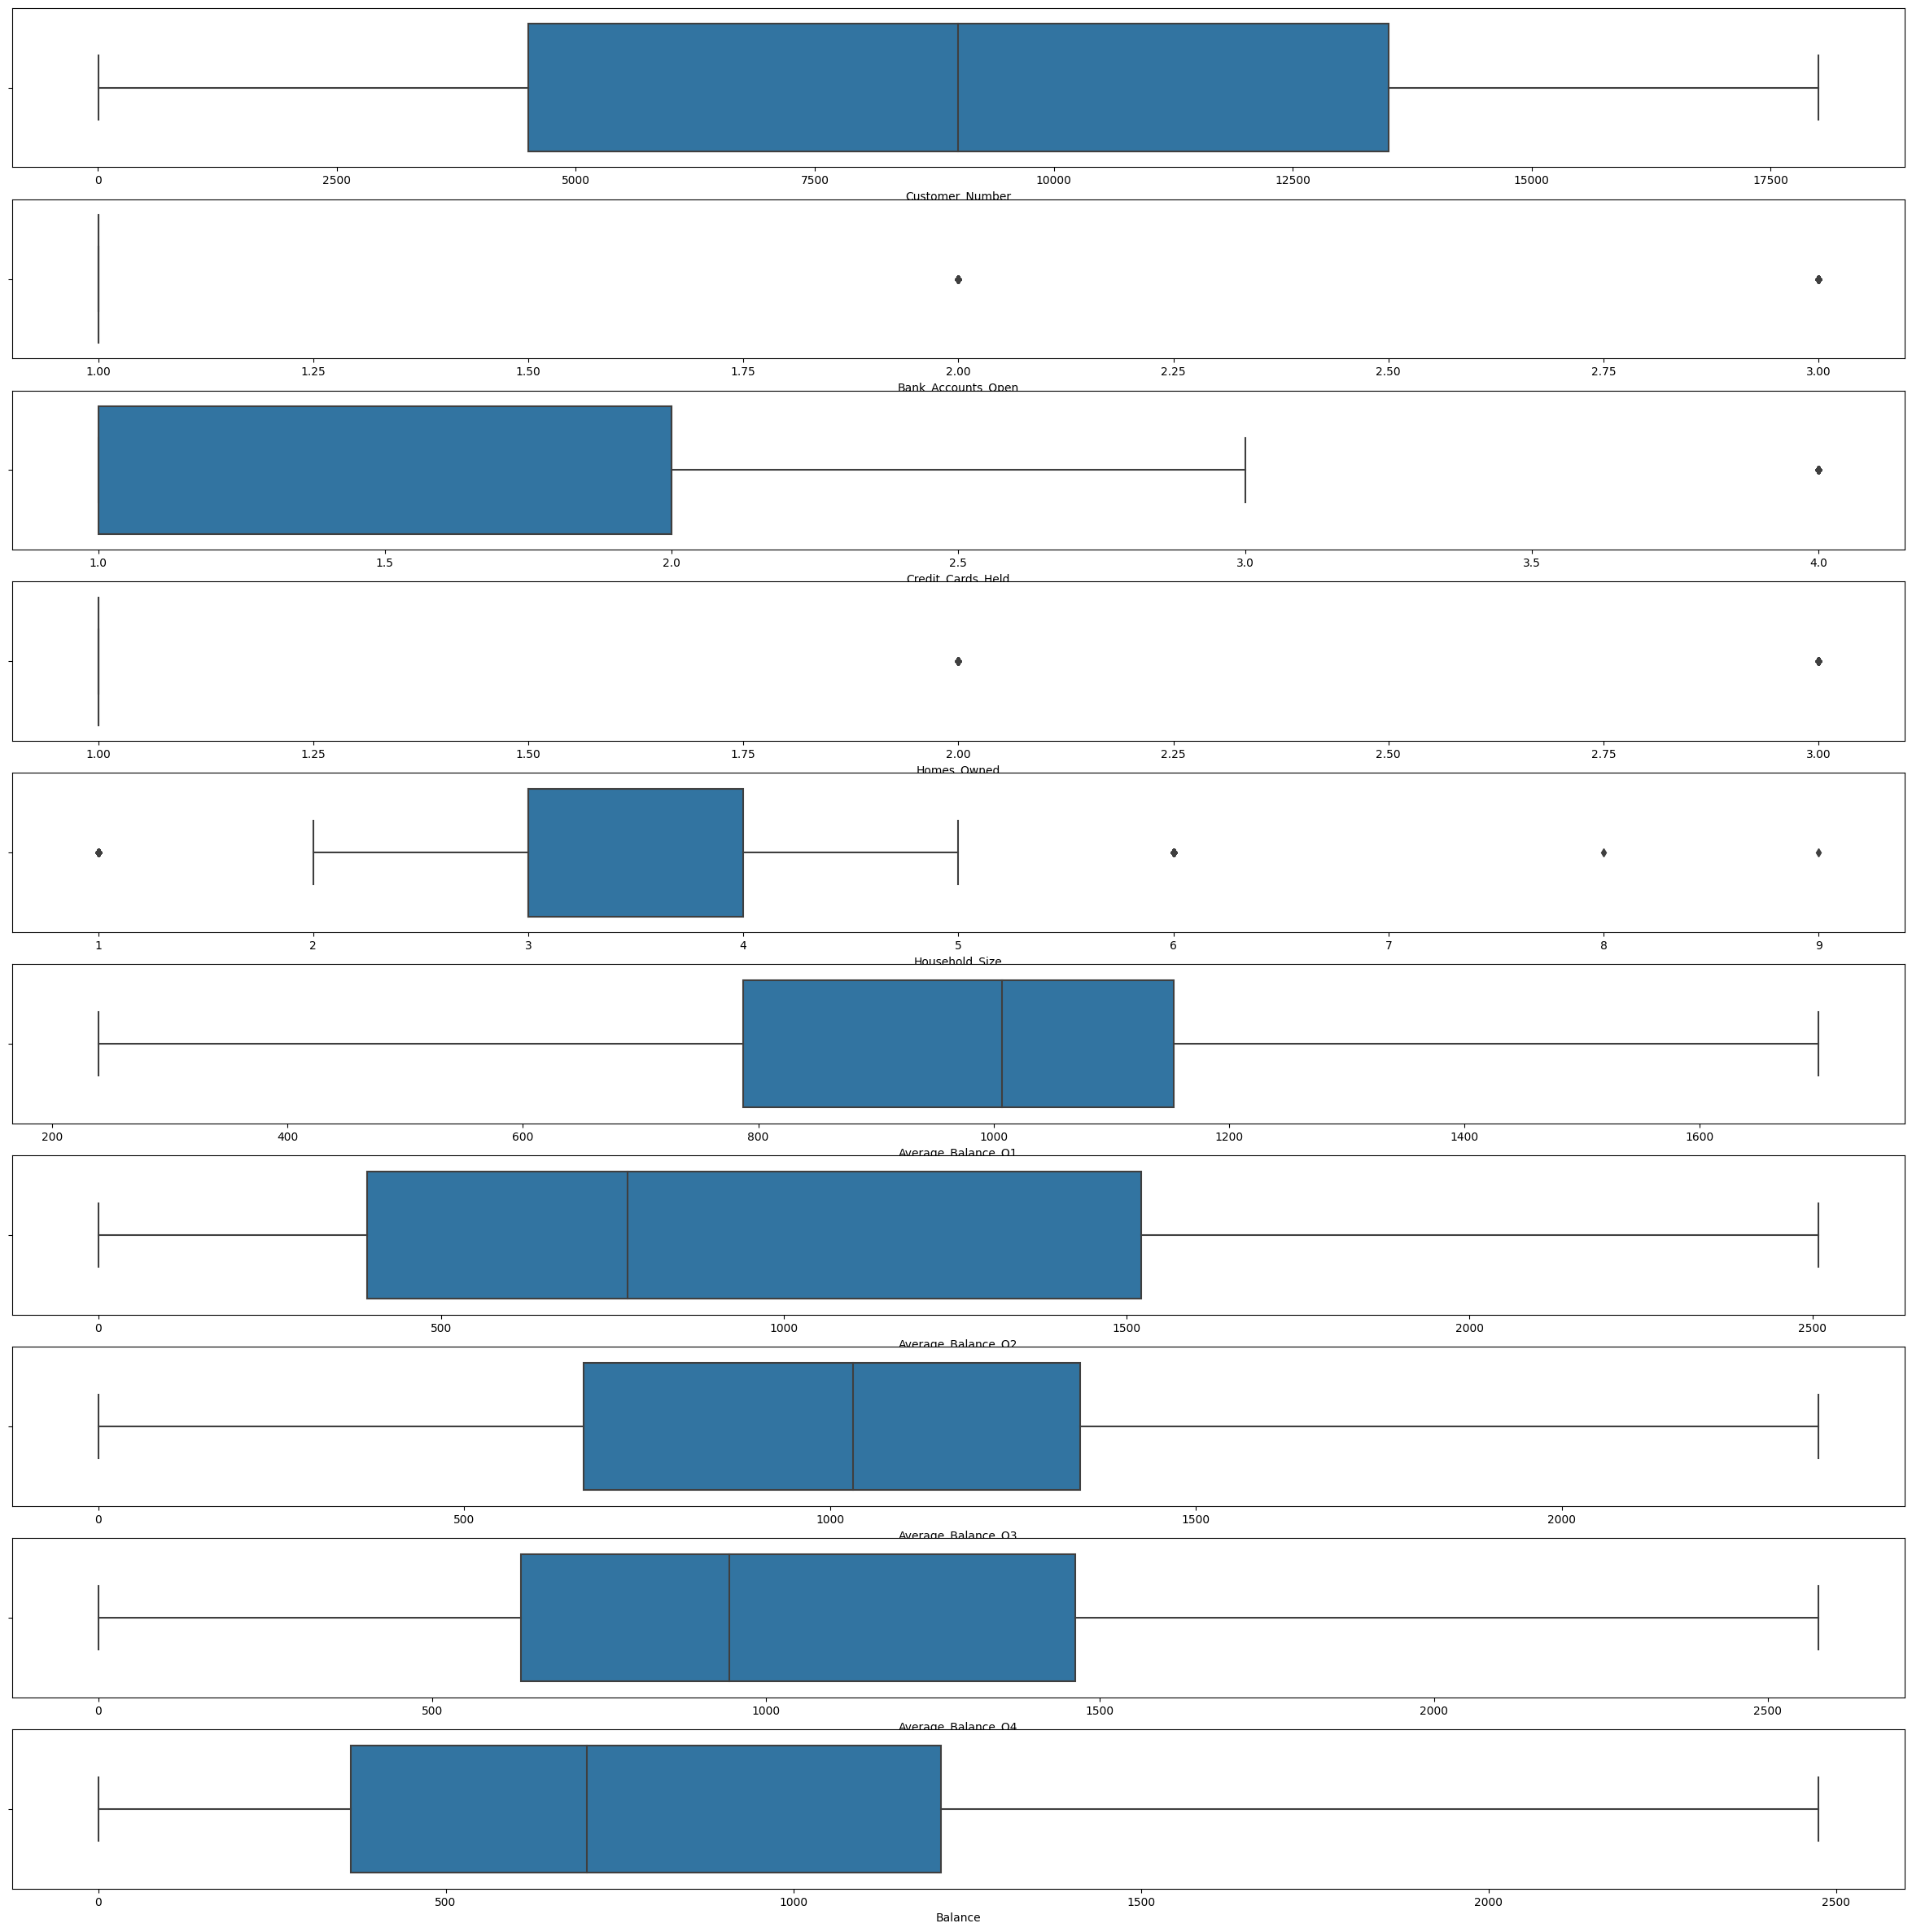

In [1116]:
#df_numericas_4 = df_numericas_4.drop(["Bank_Accounts_Open","Homes_Owned","Household_Size"], axis = 1)
fig, ax = plt.subplots(10, 1, figsize=(30,30))

for i in range(len(df_numericas_4.columns)):
    sns.boxplot(x=df_numericas_4.columns[i], data=df_numericas_4, ax=ax[i])
plt.show()

#### Para gestionar los outliers de una manera mas precisa, en vez de sustituir todos por la mediana que es un valor robusto, lo he hecho por el cuartil, que en este caso es mas preciso. Si el outlier se encontraba por debajo de los 500 euros lo sustituyo por el valor del 25%, si es mayor de 1500 por el valor del 75%.


In [1117]:
dict_outliers = detectar_outliers(df_numericas_4.columns, df3)
for key in dict_outliers.keys():
    print(key, '-', len(dict_outliers[key]), '-', len(dict_outliers[key]) * 100 / df_numericas_4.shape[0])

Bank_Accounts_Open - 4302 - 23.933240611961057
Credit_Cards_Held - 515 - 2.8650904033379696
Homes_Owned - 3474 - 19.326842837273993
Household_Size - 1079 - 6.00278164116829


Estos outliers los mantengo ya que en un futuro se pueden encodear y transformar en variables categoricas.

In [1118]:
df3.to_csv("datos/creditcardmarketing_limpio_sinoutliers.csv")

# Estandarización

In [1119]:
df = df3.copy()

In [1120]:
df.select_dtypes(include=np.number).columns

Index(['Customer_Number', 'Bank_Accounts_Open', 'Credit_Cards_Held',
       'Homes_Owned', 'Household_Size', 'Average_Balance_Q1',
       'Average_Balance_Q2', 'Average_Balance_Q3', 'Average_Balance_Q4',
       'Balance'],
      dtype='object')

In [1121]:
scaler = StandardScaler()
scaler.fit(df[['Average_Balance_Q1',"Average_Balance_Q2",'Average_Balance_Q3','Average_Balance_Q4','Balance']])
X_escaladas = scaler.transform(df[['Average_Balance_Q1',"Average_Balance_Q2",'Average_Balance_Q3','Average_Balance_Q4','Balance']])
df[['Average_Balance_Q1',"Average_Balance_Q2",'Average_Balance_Q3','Average_Balance_Q4','Balance']] = X_escaladas
df.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance_Q1,Average_Balance_Q2,Average_Balance_Q3,Average_Balance_Q4,Balance
0,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,-0.665050,-1.405827,-1.957636,-1.744586,-0.795883
1,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,-2.530891,-0.876605,-1.418309,-1.623272,-1.018374
2,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,0.910510,1.077318,1.668572,0.140303,-0.700786
3,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,0.881299,1.984094,0.785040,-0.107756,-0.797677
4,6,No,Air Miles,Letter,Medium,1,No,High,3,1,4,No,0.529856,1.511344,0.802579,-0.527827,-0.560832


In [1122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17975 entries, 0 to 17998
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       17975 non-null  int64  
 1   Offer_Accepted        17975 non-null  object 
 2   Reward                17975 non-null  object 
 3   Mailer_Type           17975 non-null  object 
 4   Income_Level          17975 non-null  object 
 5   Bank_Accounts_Open    17975 non-null  int64  
 6   Overdraft_Protection  17975 non-null  object 
 7   Credit_Rating         17975 non-null  object 
 8   Credit_Cards_Held     17975 non-null  int64  
 9   Homes_Owned           17975 non-null  int64  
 10  Household_Size        17975 non-null  int64  
 11  Own_Your_Home         17975 non-null  object 
 12  Average_Balance_Q1    17975 non-null  float64
 13  Average_Balance_Q2    17975 non-null  float64
 14  Average_Balance_Q3    17975 non-null  float64
 15  Average_Balance_Q4 

#### guardamos el escaler en un pickle

In [1123]:

import pickle

with open('datos/estandarizacion.pkl', 'wb') as s:
    pickle.dump(scaler, s)

# Codificación

In [1124]:
df.select_dtypes(include = object).head()

,Offer_Accepted,Reward,Mailer_Type,Income_Level,Overdraft_Protection,Credit_Rating,Own_Your_Home
0,No,Air Miles,Letter,Medium,No,Medium,Yes
1,No,Air Miles,Postcard,High,No,Medium,Yes
2,No,Air Miles,Letter,Medium,No,High,No
3,No,Air Miles,Letter,Medium,No,Medium,Yes
4,No,Air Miles,Letter,Medium,No,High,No


In [1125]:
# Chequeamos valores únicos

print('Offer_Accepted has', df['Offer_Accepted'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Reward has', df['Reward'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Mailer_Type has', df['Mailer_Type'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Income_Level has', df['Income_Level'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Overdraft_Protection has', df['Overdraft_Protection'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Credit_Rating has', df['Credit_Rating'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Own_Your_Home has', df['Own_Your_Home'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Bank_Accounts_Open has', df['Bank_Accounts_Open'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Credit_Cards_Held has', df['Credit_Cards_Held'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Homes_Owned has', df['Homes_Owned'].unique(), 'categories')
print("---------------------------------------------------------------------------")
print('Household_Size has', df['Household_Size'].unique(), 'categories')

Offer_Accepted has ['No' 'Yes'] categories
---------------------------------------------------------------------------
Reward has ['Air Miles' 'Cash Back' 'Points'] categories
---------------------------------------------------------------------------
Mailer_Type has ['Letter' 'Postcard'] categories
---------------------------------------------------------------------------
Income_Level has ['Medium' 'High' 'Low'] categories
---------------------------------------------------------------------------
Overdraft_Protection has ['No' 'Yes'] categories
---------------------------------------------------------------------------
Credit_Rating has ['Medium' 'High' 'Low'] categories
---------------------------------------------------------------------------
Own_Your_Home has ['Yes' 'No'] categories
---------------------------------------------------------------------------
Bank_Accounts_Open has [1 2 3] categories
---------------------------------------------------------------------------
Credi

In [1126]:

orden_reward = ['Air Miles', 'Cash Back','Points']
orden_mailer = ['Letter', 'Postcard']
orden_income = ['Medium' ,'High' ,'Low']
orden_protect = ['No', 'Yes']
orden_credit = ['Medium', 'High' ,'Low']
orden_own = ['Yes' 'No']
orden_cuentas = [1 ,2, 3]
orden_tarjetas = [2, 1 ,3 ,4]
orden_casas = [2, 1, 3]
orden_size = [5 ,2 ,4, 6, 3, 1, 8, 9]

existen variables categóricas con orden:

- Income_Level
- Bank_Accounts_Open
- Overdraft_protection
- Credit_Card_Held
- Homes_Owned
- Household_Size
- Own_Your_Home

y existen otras variables categóricas que no parecen tener orden:

- Reward
- Mailer_Type
- Credit_Rating

In [1127]:
def one_hot_encoder(dff, columnas):
    
    oh = OneHotEncoder()
    
    transformados = oh.fit_transform(dff[columnas])
    
    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
    
    dff[oh_df.columns] = oh_df
    
    dff.drop(columnas, axis = 1, inplace = True)
    
    with open(f'datos/encoding{columnas[0]}.pkl', 'wb') as s:
        pickle.dump(oh, s)
    
    return dff

In [1128]:
def ordinal_encoder(orden, df, columna):
    ordinal = OrdinalEncoder(categories = [orden], dtype = int)
    transformados_oe = ordinal.fit_transform(df[[columna]])
    df[columna] = transformados_oe
    
    with open(f'datos/encoding{columna}.pkl', 'wb') as s:
        pickle.dump(ordinal, s)
    return df


In [1129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17975 entries, 0 to 17998
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       17975 non-null  int64  
 1   Offer_Accepted        17975 non-null  object 
 2   Reward                17975 non-null  object 
 3   Mailer_Type           17975 non-null  object 
 4   Income_Level          17975 non-null  object 
 5   Bank_Accounts_Open    17975 non-null  int64  
 6   Overdraft_Protection  17975 non-null  object 
 7   Credit_Rating         17975 non-null  object 
 8   Credit_Cards_Held     17975 non-null  int64  
 9   Homes_Owned           17975 non-null  int64  
 10  Household_Size        17975 non-null  int64  
 11  Own_Your_Home         17975 non-null  object 
 12  Average_Balance_Q1    17975 non-null  float64
 13  Average_Balance_Q2    17975 non-null  float64
 14  Average_Balance_Q3    17975 non-null  float64
 15  Average_Balance_Q4 

In [1130]:
df["Bank_Accounts_Open"] = df["Bank_Accounts_Open"].astype(int).astype(str)

In [1131]:
df["Credit_Cards_Held"] = df["Credit_Cards_Held"].astype(int).astype(str)

In [1132]:
#df["Overdraft_Protection"] = df["Overdraft_Protection"].astype(int).astype(str)

In [1133]:
df["Homes_Owned"] = df["Homes_Owned"].astype(int).astype(str)

In [1134]:
df["Household_Size"] = df["Household_Size"].astype(int).astype(str)

In [1135]:
#df["Income_Level"] = df["Income_Level"].astype(int).astype(str)

se cambia el tipo de las variables para poder hacer el encoder, necesita ser un str

In [1136]:
sin_orden = ['Reward', 'Mailer_Type', 'Credit_Rating']
con_orden = ['Income_Level', 'Bank_Accounts_Open', 'Overdraft_Protection', 'Credit_Cards_Held', 'Homes_Owned', 'Household_Size', 'Own_Your_Home']

In [1137]:
"""df = ordinal_encoder(orden_income, df, "Income_Level")
df = ordinal_encoder(orden_cuentas, df, "Bank_Accounts_Open")
df = ordinal_encoder(orden_protect, df, "Overdraft_Protection")
df = ordinal_encoder(orden_tarjetas, df, "Credit_Card_Held")
df = ordinal_encoder(orden_own, df, "Own_Your_Home")
df = ordinal_encoder(orden_size, df, "Household_Size")
df = ordinal_encoder(orden_casas, df, "Homes_Owned")
df = one_hot_encoder(df, ["Reward"])
df = one_hot_encoder(df, ["Mailer_Type"])
df = one_hot_encoder(df, ["Credit_Rating"])
para hacerlo asi habia que cambiar el tipo de dato a string, para que las considere categorica"""

'df = ordinal_encoder(orden_income, df, "Income_Level")\ndf = ordinal_encoder(orden_cuentas, df, "Bank_Accounts_Open")\ndf = ordinal_encoder(orden_protect, df, "Overdraft_Protection")\ndf = ordinal_encoder(orden_tarjetas, df, "Credit_Card_Held")\ndf = ordinal_encoder(orden_own, df, "Own_Your_Home")\ndf = ordinal_encoder(orden_size, df, "Household_Size")\ndf = ordinal_encoder(orden_casas, df, "Homes_Owned")\ndf = one_hot_encoder(df, ["Reward"])\ndf = one_hot_encoder(df, ["Mailer_Type"])\ndf = one_hot_encoder(df, ["Credit_Rating"])\npara hacerlo asi habia que cambiar el tipo de dato a string, para que las considere categorica'

In [1138]:

def encoding(dataframe, columnas, input):
    if input == 'sin orden':
        modelo = OneHotEncoder()
        for columna in columnas:
            transformados = modelo.fit_transform(dataframe[[columna]])
            
            oh_df = pd.DataFrame(transformados.toarray(), columns = modelo.get_feature_names_out(), dtype = int)
            
            dataframe[oh_df.columns] = oh_df
            
            dataframe.drop(columna, axis = 1, inplace = True)
            
            with open(f'datos/encoding_{columna}.pkl', 'wb') as s:
                pickle.dump(modelo, s)
        
        return dataframe
    elif input == 'con orden':
        for columna in columnas:
            if dataframe[columna].dtype == 'float64' or dataframe[columna].dtype == 'int64':
                dataframe[columna] = dataframe[columna].astype(int).astype(str)
            else:
                pass
            orden = pd.DataFrame(dataframe[columna].value_counts()).reset_index().sort_values(by=columna)['index'].unique().tolist()
            modelo = OrdinalEncoder(categories = [orden], dtype = int)
            transformados = modelo.fit_transform(dataframe[[columna]])
            dataframe[columna] = transformados
            with open(f'datos/encoding_{columna}.pkl', 'wb') as s:
                pickle.dump(modelo, s)
        return dataframe
    else:
        print("aprende a escribir")
   

In [1139]:
df_sin=encoding(df, sin_orden, 'sin orden')

In [1140]:
df_con=encoding(df, con_orden, 'con orden')

In [1141]:
df_final = pd.concat([df_con,df_sin], axis=1)
df_final.head()

,Customer_Number,Offer_Accepted,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,Average_Balance_Q1,...,Average_Balance_Q4,Balance,Reward_Air Miles,Reward_Cash Back,Reward_Points,Mailer_Type_Letter,Mailer_Type_Postcard,Credit_Rating_High,Credit_Rating_Low,Credit_Rating_Medium
0,2,No,2,2,1,3,1,5,1,-0.665050,...,-1.744586,-0.795883,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3,No,1,1,1,3,2,4,1,-2.530891,...,-1.623272,-1.018374,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,4,No,2,1,1,2,2,6,0,0.910510,...,0.140303,-0.700786,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,5,No,2,2,1,3,2,2,1,0.881299,...,-0.107756,-0.797677,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,6,No,2,2,1,1,2,6,0,0.529856,...,-0.527827,-0.560832,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [1142]:
df_final.shape

(17975, 44)

In [1156]:
df_final= df_final.dropna(how = "any")

# Balanceo

In [1157]:
def balanceo(dataframe, variable_respuesta, input):
    X = dataframe.drop([variable_respuesta], axis = 1)
    y = dataframe[[variable_respuesta]]
    if input == 'downsampling':
        modelo = RandomUnderSampler()
    elif input == 'upsampling':
        modelo = RandomOverSampler()
    else:
        print("aprende a escribir")
    X_mod, y_mod = modelo.fit_resample(X,y)
    return X_mod, y_mod

In [1158]:
df_final.columns

Index(['Customer_Number', 'Offer_Accepted', 'Income_Level',
       'Bank_Accounts_Open', 'Overdraft_Protection', 'Credit_Cards_Held',
       'Homes_Owned', 'Household_Size', 'Own_Your_Home', 'Average_Balance_Q1',
       'Average_Balance_Q2', 'Average_Balance_Q3', 'Average_Balance_Q4',
       'Balance', 'Reward_Air Miles', 'Reward_Cash Back', 'Reward_Points',
       'Mailer_Type_Letter', 'Mailer_Type_Postcard', 'Credit_Rating_High',
       'Credit_Rating_Low', 'Credit_Rating_Medium', 'Customer_Number',
       'Offer_Accepted', 'Income_Level', 'Bank_Accounts_Open',
       'Overdraft_Protection', 'Credit_Cards_Held', 'Homes_Owned',
       'Household_Size', 'Own_Your_Home', 'Average_Balance_Q1',
       'Average_Balance_Q2', 'Average_Balance_Q3', 'Average_Balance_Q4',
       'Balance', 'Reward_Air Miles', 'Reward_Cash Back', 'Reward_Points',
       'Mailer_Type_Letter', 'Mailer_Type_Postcard', 'Credit_Rating_High',
       'Credit_Rating_Low', 'Credit_Rating_Medium'],
      dtype='object')

In [1159]:
# separamos los datos en X e y. Siendo X las variables predictoras e y  la variable a predecir. 

X = df_final[['Customer_Number','Income_Level',
       'Bank_Accounts_Open', 'Overdraft_Protection', 'Credit_Cards_Held',
       'Homes_Owned', 'Household_Size', 'Own_Your_Home', 'Average_Balance_Q1',
       'Average_Balance_Q2', 'Average_Balance_Q3', 'Average_Balance_Q4',
       'Balance', 'Reward_Air Miles', 'Reward_Cash Back', 'Reward_Points',
       'Mailer_Type_Letter', 'Mailer_Type_Postcard', 'Credit_Rating_High',
       'Credit_Rating_Low', 'Credit_Rating_Medium', 'Customer_Number',
       'Offer_Accepted', 'Income_Level', 'Bank_Accounts_Open',
       'Overdraft_Protection', 'Credit_Cards_Held', 'Homes_Owned',
       'Household_Size', 'Own_Your_Home', 'Average_Balance_Q1',
       'Average_Balance_Q2', 'Average_Balance_Q3', 'Average_Balance_Q4',
       'Balance', 'Reward_Air Miles', 'Reward_Cash Back', 'Reward_Points',
       'Mailer_Type_Letter', 'Mailer_Type_Postcard', 'Credit_Rating_High',
       'Credit_Rating_Low', 'Credit_Rating_Medium']]
y = df_final["Offer_Accepted"]

In [1160]:
# iniciamos el método

upp = RandomOverSampler()

In [1161]:
# como siempre, ajustamos el modelo

X_upp, y_upp = upp.fit_resample(X, y)

ValueError: y should be a 1d array, got an array of shape (17951, 2) instead.

me genera error, nose porque...

# Ajuste de modelo 

In [1162]:
# dividimos el dataset en variables predictoras y respuesta
X = df_final.drop("Offer_Accepted", axis = 1) # variables predictoras
y = df_final["Offer_Accepted"] # variable respuesta 

Después dividiremos los datos en `train`(entrenamiento) y `test`(prueba). 

Utilizamos los datos de entrenamiento para ajustar el modelo y los datos de prueba para comprobarlo. Los modelos generados sirven para predecir los resultados desconocidos que se denominan conjunto de prueba.

In [1163]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 666)

In [1164]:
y_train.describe()

,Offer_Accepted,Offer_Accepted
count,14360,14360
unique,2,2
top,No,No
freq,13548,13548


In [1165]:
y_test.describe()

,Offer_Accepted,Offer_Accepted
count,3591,3591
unique,2,2
top,No,No
freq,3384,3384


## Logistic Regression

In [1166]:
lr = LogisticRegression(max_iter = 100000)
lr.fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (14360, 2) instead.

In [1167]:
## no se que he hecho mal pero me sale ""ValueError: y should be a 1d array, got an array of shape (14360, 2) instead."" este error un par de veces.